# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучите общую информацию. 

* Скачаем датасет

In [1]:
import pandas as pd

In [2]:
try:
    data = pd.read_csv("/datasets/real_estate_data.csv", sep ="\t")
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv')

* Посмотрим на наш датасет

Загрузим данные из файла в датафрейм.
Изучим общую информацию о полученном датафрейме.

In [3]:
data.shape

(23699, 22)

In [4]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


* Построим общую гистограмму для всех числовых столбцов таблицы.

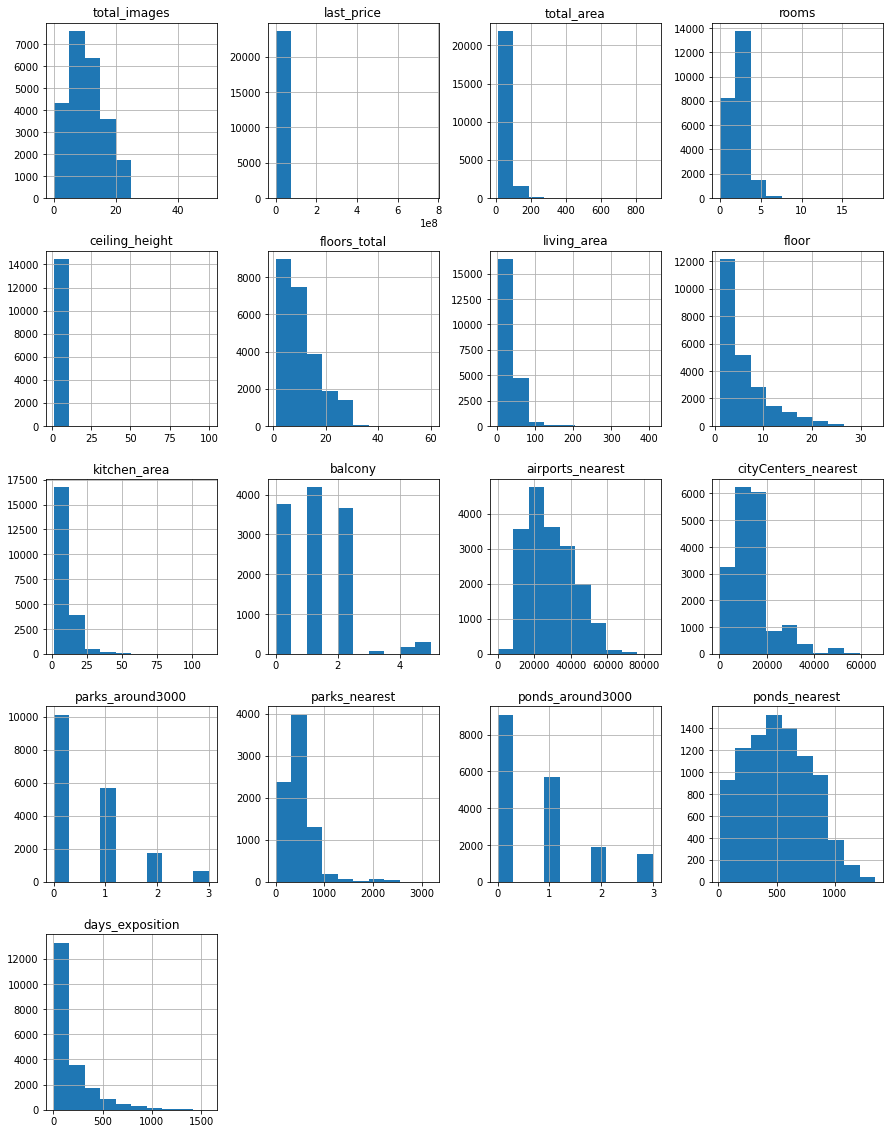

In [7]:
import numpy as np
import matplotlib.pyplot as plt
data.hist(figsize=(15, 20))

plt.title('My title')
plt.xlabel('categories')
plt.ylabel('values')

plt.show()

### Предобработка данных


Заполним пропущенные значения там, где это возможно. 
 
Найдем столбцы, в которых нужно изменить тип данных.
Преобразуем тип данных в выбранных столбцах.

* Определяем, в каких столбцах есть пропуски.



In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

* В столбце ceiling_height много пропущенных значений, заменю их на медианные значения, только нужно будет проверить на аномальные выбросы, так как может быть такое, что указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. 
* floors_total мало пропущенных значений, можем отбросить эти данные
* living_area мало пропущенных значений (не знаю стоит ли заменять на медианное значение, так как это может исказить результат)
* is_apartment много пропущенных значений, Возможно указаны только значения True. 
* kitchen_area - немного прощущенных значений, заменим на медианные значения
* balcony много пропущенных значений, скорее всего указаны только значения True.
* airports_nearest - немного пропущенных значений, заменим на медианные, сгруппированные по living_area
* cityCenters_nearest  - немного пропущенных значений, заменим на медианные, сгруппированные по living_area
* parks_around3000 - немного пропущенных значений, Возможно указаны только значения, где есть парки, а если парков нет, то указано NaN
* parks_nearest - Много пропущенных значений, Возможно ошибки получения автоматических данных на основе картографических данных, заменим медианным значение сгруппированным по living_area
* ponds_around3000 - немного пропущенных значений, Возможно указаны только значения, где есть водоемы рядом, а если водоемов нет, то указано NaN
* ponds_nearest - Много пропущенных значений, Возможно ошибки получения автоматических данных на основе картографических данных, заменим медианным значение сгруппированным по living_area
* days_exposition - мало пропущенных значений, Ничем не заменим, просто удалим данные значения, так как при анализе эти данные играют неважную роль

Пропущенные значения есть в ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest,cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition 

Предпологаю, что если в датафрейме не указано число  balcony,  parks_around3000, ponds_around3000, is_apartment то, скорее всего, в его квартире и около квартиры их нет. Такие пропуски правильно заменить на 0. 

ceiling_height, floors_total, living_area, kitchen_area, parks_nearest, ponds_nearest, cityCenters_nearest, airports_nearest можно заменить медианным значением, если значения связаны с близлежащим расположением объектов (например аэропорт или парк), то можно сгруппировать по local_area. Я думаю, что тут пропуски связаны с тем, что продавец не знал эти данные и не захотел их считать. Или связаны с ошибками получения автоматических данных на основе картографических данных

В days_exposition продавец ничего не указал, так как не хочет обновлять информацию каждый день. А locality_name никак не заменить поэтому оставим пропуски пустыми. Даже можно отбросить эти значения, так как таких пропусков совсем мало и их удаление несильно повлияет на анализ датасета



* Заполняем пропущенные значения там, где это возможно. 
Если не указано число балконов, апартаменты это или нет, число водоемов и парков в пределе 3км  то, скорее всего, указано, только если эти объекты имеются в данной квартире. Заменим пропуски на 0

In [9]:
data["parks_around3000"] = data["parks_around3000"].fillna(0)
data["ponds_around3000"] = data["ponds_around3000"].fillna(0)
data["balcony"] = data["balcony"].fillna(0)
data["is_apartment"] = data["is_apartment"].fillna(0)

In [11]:
data["ceiling_height"].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Есть 100 метровые потолки(эти данные отбросим), Также представлены следующие значения - 25, 22.6, 20, 32, 27, 26, 24, 14, 27.5. Думаю сначала исправим эти значения, а потом откинем все неправдоподобные, например меньше 2х метров и больше 5ти метров 

In [12]:
data['ceiling_height'] = data['ceiling_height'].replace(25, 2.5) 
data['ceiling_height'] = data['ceiling_height'].replace(32, 3.2) 
data['ceiling_height'] = data['ceiling_height'].replace(27, 2.7) 
data['ceiling_height'] = data['ceiling_height'].replace(26, 2.6) 
data['ceiling_height'] = data['ceiling_height'].replace(24, 2.4) 
data['ceiling_height'] = data['ceiling_height'].replace(14, 1.4)
data['ceiling_height'] = data['ceiling_height'].replace(27.5, 2.75) 
data['ceiling_height'] = data['ceiling_height'].replace(22.6, 2.26) 
data['ceiling_height'] = data['ceiling_height'].replace(20, 2) 

In [13]:
#заполним пропуски медианным значением
median_ceiling_height = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(value = median_ceiling_height)

In [14]:
data = data[(data['ceiling_height'] > 2) & (data['ceiling_height'] < 5)]

In [15]:
data["ceiling_height"].unique()

array([2.7 , 2.65, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 4.15,
       3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 , 3.06,
       2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 2.87, 2.66, 2.59,
       2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.16, 3.62, 3.12,
       2.53, 2.74, 2.96, 2.46, 2.79, 2.95, 4.06, 2.94, 3.82, 3.54, 3.53,
       2.83, 4.7 , 2.4 , 3.38, 3.01, 3.65, 3.9 , 3.18, 3.35, 2.3 , 3.57,
       2.48, 2.62, 2.82, 3.98, 2.63, 3.83, 3.52, 3.95, 3.75, 2.88, 3.67,
       3.87, 3.66, 3.85, 3.86, 4.19, 3.24, 4.8 , 4.5 , 4.2 , 3.36, 3.08,
       3.68, 3.07, 3.37, 3.09, 3.26, 3.34, 2.81, 3.44, 2.97, 3.14, 4.37,
       2.68, 3.22, 3.27, 4.1 , 2.93, 3.46, 3.47, 3.33, 3.63, 3.32, 2.98,
       2.86, 3.17, 4.4 , 3.28, 3.04, 4.45, 3.84, 3.23, 3.02, 3.21, 3.43,
       3.78, 4.3 , 3.39, 2.69, 3.31, 4.65, 3.56, 2.2 , 3.51, 3.93, 3.42,
       2.99, 3.49, 4.14, 2.91, 3.88, 4.25, 3.29, 2.

In [16]:
#Посмотрим на значения по количеству этажей
data["floors_total"].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52.])

Посмотрела в интернете самое высокое здание в Питере: 
Первое место — бизнес-центр «LEADER TOWER»

Её еще называют Башней Конституции.
Высота: 145,5 метров, 42 этажа. Поэтому откинем все значения из датасета, которые больше 42

In [17]:
#выберем правдоподобные значения
data = data[(data['floors_total'] <= 42)]

In [18]:
#выберем правдоподобные значения по комнатам, потому что заметила, что есть квартиры с комнатами = 0, скорее всего это ошибка заполнени ядатасета
data = data[(data['rooms'] != 0)]

In [19]:
# Посмотрим и исправим значения в названии населённого пункта
data["locality_name"].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

В таблице встречаются в названии и "поселок", "посёлок", "посёлок городского типа", "городской посёлок" это необходимо исправить на просто "посёлок". Ну и ещё другие неявные дупликаты, котрые замечу исплавлю

In [20]:
data['locality_name'] = data['locality_name'].str.replace("поселок", "посёлок")
data['locality_name'] = data['locality_name'].str.replace("посёлок городского типа", "посёлок")
data['locality_name'] = data['locality_name'].str.replace("поселок городского типа", "посёлок")
data['locality_name'] = data['locality_name'].str.replace("городской посёлок", "посёлок")
data['locality_name'] = data['locality_name'].str.replace("Кудрово", "деревня Кудрово")
data['locality_name'] = data['locality_name'].str.replace("посёлок Сапёрное", "посёлок Сапёрный") 

In [21]:
#Все остальные данные с назаданными названиями удалим, так как их осталось мало (48 значений)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1854
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2030
balcony                     0
locality_name              48
airports_nearest         5444
cityCenters_nearest      5421
parks_around3000            0
parks_nearest           15385
ponds_around3000            0
ponds_nearest           14408
days_exposition          3152
dtype: int64

In [22]:
data = data.dropna(subset=['locality_name'])
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1849
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2021
balcony                     0
locality_name               0
airports_nearest         5436
cityCenters_nearest      5413
parks_around3000            0
parks_nearest           15352
ponds_around3000            0
ponds_nearest           14385
days_exposition          3151
dtype: int64

In [23]:
#смотрю сколько значений осталось
data.shape

(23340, 22)

In [24]:
# Посмотрим на правдоподобность других значений (близлежайшие парки и водоемы, отберем значения)
print(f'Близлежайший парк находится в {data["parks_nearest"].min()} метрах')
print(f'Близлежайший водоём находится в {data["ponds_nearest"].min()} метрах')

Близлежайший парк находится в 1.0 метрах
Близлежайший водоём находится в 13.0 метрах


In [25]:
#Отберем значения, пусть парк находится на расстоянии 20 метрах от дома, а водоем в 50ти метрах

#data = data[(data["parks_nearest"] > 10)]
#data = data[(data["ponds_nearest"] > 20)]

In [26]:
data.shape

(23340, 22)

<div class="alert alert-info">
<h2> Я уже снизошла до парков, которые находятся в 10метрах, а водоемах в 20ти метрах, но все равно удаляется слишком много данных, так чтоне буду делать этото шаг
    <a class="tocSkip"></h2>

</div>  

In [27]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1849
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2021
balcony                     0
locality_name               0
airports_nearest         5436
cityCenters_nearest      5413
parks_around3000            0
parks_nearest           15352
ponds_around3000            0
ponds_nearest           14385
days_exposition          3151
dtype: int64

In [29]:
data['days_exposition']=round(data['days_exposition']).astype('Int64')

In [30]:
data.shape

(23340, 22)

In [31]:
# А в kitchen_area вставим медианные значения
median_kitchen_area = data["kitchen_area"].median()
data["kitchen_area"] = data["kitchen_area"].fillna(median_kitchen_area)

In [32]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1849
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5436
cityCenters_nearest      5413
parks_around3000            0
parks_nearest           15352
ponds_around3000            0
ponds_nearest           14385
days_exposition          3151
dtype: int64

In [33]:
#Найдем столбцы, в которых нужно изменить тип данных.
#Преобразуем тип данных в выбранных столбцах.

data["first_day_exposition"]
data['time'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M')

In [34]:
#Посмторим на дупликаты,если они есть, то удалим их
data.duplicated().sum()

0

Дупликатов не осталось, не будем тогда удалять то, чего нет

In [35]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23340.000000,2.334000e+04,23340.000000,23340.000000,23340.000000,23340.000000,21491.000000,23340.000000,23340.000000,23340.000000,17904.000000,17927.000000,23340.000000,7988.000000,23340.000000,8955.000000,20189.000000
mean,9.894473,6.551768e+06,60.551419,2.087789,2.696269,10.621551,34.574924,5.855741,10.432213,0.589974,28825.788260,14198.206448,0.470865,490.269404,0.590531,518.397208,181.369211
std,5.681482,1.086626e+07,35.480968,1.065914,0.215492,6.553207,22.033243,4.852348,5.644561,0.959617,12630.481538,8629.345022,0.749400,341.831515,0.884516,278.023038,220.123893
min,0.000000,1.219000e+04,12.000000,1.000000,2.200000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.450000e+06,40.200000,1.000000,2.600000,5.000000,18.700000,2.000000,7.300000,0.000000,18581.000000,9238.000000,0.000000,287.750000,0.000000,293.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26772.000000,13094.000000,0.000000,454.000000,0.000000,503.000000,96.000000
75%,14.000000,6.800000e+06,70.000000,3.000000,2.700000,16.000000,42.420000,8.000000,11.500000,1.000000,37298.000000,16285.000000,1.000000,612.000000,1.000000,731.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,4.900000,36.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


<div class="alert alert-info">
<h2> Комментарий
    <a class="tocSkip"></h2>
Пусть количество комнат в квартире будет от 1 до 19, как оно и есть. Минимальное значение общей площади 12 кв метров тоже допускаю. Загуглила продают и квартиры 5.5 кв метров, в Ленинградской области самая маленькая квартира - 10.5 кв метров. Но площадь 900 кв. м слишком большая (возьмем значение до 539 кв метров). Ну и уберем аномально маленькие и большие цены(пусть будут стоить от 500 тысяч до 40 млн руб). И еще диапазон для размещения объявления примем до полутора года, потому что если объявление висит больше 1.5 лет, то вряд ли владелец хочет вообще эту квартиру продавать. 
</div>  

<div class="alert alert-info">
<h2> Комментарий
    <a class="tocSkip"></h2>
Площадь самой большой квартиры Санкт-Петербурга составляет 539 квадратных метров. Об этом сообщается в материалах аналитиков ЦИАН (есть в распоряжении «Ленты.ру»). Самая маленькая квартира - 10,5 кв. м: «малютка» для студента – 1,2 млн. Самая малюсенькая студия, размером всего 10,5 кв. м, находится на первом этаже пятиэтажного дома на улице Софьи Ковалевской – от станции метрo «Академическая» в 20 минутах пешком.
</div>  

In [36]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,time
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,0,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,<NA>,2019-03-07
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,0,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,2018-12-04
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,0,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,2015-08-20
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,0,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,2015-07-24
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,0,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,2018-06-19


In [37]:
#площадь менее 539 кв метров
data = data[(data["total_area"] < 539)]

In [38]:
#Объявление выставлено менее 500 дней
data = data[(data["days_exposition"] < 500)]

In [39]:
#Цена квартиры от 500 тыс, до 40 млн рубле
data = data[(data["last_price"] < 40000000)]
data = data[(data["last_price"] > 500000)]

In [40]:
data = data[(data["last_price"] > 500000)]

In [41]:
data.shape

(18332, 23)

### Посчитайте и добавьте в таблицу новые столбцы

In [42]:
#Добавим в таблицу новый столбец с ценой одного квадратного метра:

data["price_per_sq_meter"] = data["last_price"] / (data["total_area"]**2)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,time,price_per_sq_meter
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,0,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,2018-12-04,2052.494853
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,0,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,2018-06-19,1000.000000
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,0,...,посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55,2018-09-10,3127.164127
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,0,...,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155,2017-11-02,2659.402425
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,0,...,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189,2018-05-23,2637.357201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.30,4,0,...,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29,2018-02-28,2848.911395
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,2.65,5.0,31.00,2,0,...,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15,2018-07-19,2034.023669
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.65,5.0,17.50,4,0,...,Тихвин,NaN,NaN,0.0,NaN,0.0,NaN,413,2017-07-07,1500.000000
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.00,8,0,...,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239,2016-08-05,1181.377383


In [43]:
#Добавим в таблицу день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
data['weekday'] = data['time'].dt.weekday

In [44]:
#Добавим в таблицу месяц публикации объявления;
data["month"] = data["time"].dt.month

In [45]:
#Добавим год публикации объявления;
data["year"] = data["time"].dt.year

In [46]:
#посмотрим на получившиеся данные
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,time,price_per_sq_meter,weekday,month,year
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,0,...,0.0,NaN,0.0,NaN,81,2018-12-04,2052.494853,1,12,2018
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,0,...,2.0,112.0,1.0,48.0,121,2018-06-19,1000.000000,1,6,2018
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,0,...,0.0,NaN,0.0,NaN,55,2018-09-10,3127.164127,0,9,2018
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,0,...,0.0,NaN,0.0,NaN,155,2017-11-02,2659.402425,3,11,2017
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,0,...,0.0,NaN,0.0,NaN,189,2018-05-23,2637.357201,2,5,2018
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,0,...,0.0,NaN,0.0,NaN,289,2017-02-26,1451.222790,6,2,2017
10,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.67,12.0,20.30,3,0,...,1.0,310.0,2.0,553.0,137,2017-11-16,3220.334660,3,11,2017
11,9,3300000.0,44.00,2018-08-27T00:00:00,2,2.65,5.0,31.00,4,False,...,0.0,NaN,0.0,NaN,7,2018-08-27,1704.545455,0,8,2018
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.65,5.0,30.00,5,0,...,0.0,NaN,0.0,NaN,90,2016-06-30,1334.019204,3,6,2016
13,20,3550000.0,42.80,2017-07-01T00:00:00,2,2.56,5.0,27.00,5,0,...,1.0,294.0,3.0,298.0,366,2017-07-01,1937.942178,5,7,2017


In [47]:
# Добавим тип этажа квартиры (значения — «‎первый», «последний», «другой»);
def cat_floors(row):
    if row["floor"] == row["floors_total"]:
        return "последний"
    elif row["floor"] == 1:
        return "первый"
    else:
        return "другой"
data["type_of_floor"] = data.apply(cat_floors, axis = 1)

In [48]:
# Добавим расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).
data["kms_per_citycenter"] = round(data["cityCenters_nearest"] / 1000)

### Проведите исследовательский анализ данных

Изучим следующие параметры объектов:

общая площадь; жилая площадь; площадь кухни; цена объекта; количество комнат; высота потолков; этаж квартиры; тип этажа квартиры («первый», «последний», «другой»); общее количество этажей в доме; расстояние до центра города в метрах; расстояние до ближайшего аэропорта; расстояние до ближайшего парка; день и месяц публикации объявления.

Построем отдельные гистограммы для каждого из этих параметров. Опишите все ваши наблюдения по параметрам в ячейке с типом markdown. Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. Постройте гистограмму. Посчитайте среднее и медиану. В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими? Какие факторы больше всего влияют на общую (полную) стоимость объекта? Изучите, зависит ли цена от: общей площади; жилой площади; площади кухни; количества комнат; этажа, на котором расположена квартира (первый, последний, другой); даты размещения (день недели, месяц, год). Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы. Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name. Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города. 

count    16784.000000
mean        32.385430
std         17.969347
min          2.000000
25%         18.200000
50%         29.700000
75%         40.500000
max        279.600000
Name: living_area, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


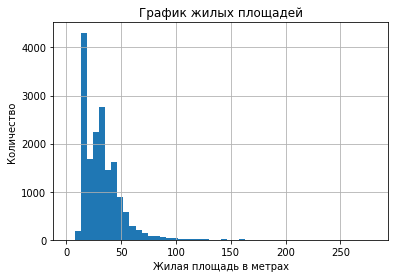

In [49]:
#жилая площадь;
print(data["living_area"].describe())
data["living_area"].hist(bins=50)

plt.title('График жилых площадей')
plt.xlabel('Жилая площадь в метрах')
plt.ylabel('Количество')

plt.show()

count    18332.000000
mean        56.851321
std         27.449318
min         12.000000
25%         39.417500
50%         50.000000
75%         66.100000
max        470.300000
Name: total_area, dtype: float64


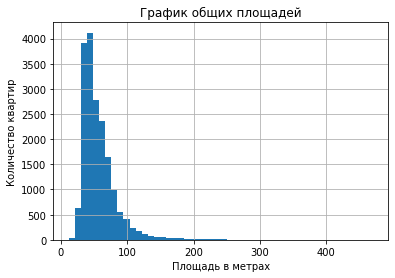

In [89]:
#общая площадь;
print(data["total_area"].describe())
data["total_area"].hist(bins=50)

plt.title('График общих площадей')
plt.xlabel('Площадь в метрах')
plt.ylabel('Количество квартир')

plt.show()

count    18332.000000
mean        10.059548
std          4.718543
min          2.000000
25%          7.200000
50%          9.100000
75%         11.000000
max        100.700000
Name: kitchen_area, dtype: float64


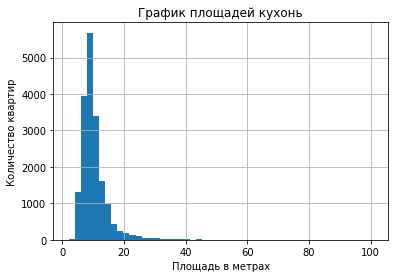

In [88]:
#площадь кухни;
print(data["kitchen_area"].describe())
data["kitchen_area"].hist(bins=50)

plt.title('График площадей кухонь')
plt.xlabel('Площадь в метрах')
plt.ylabel('Количество квартир')

plt.show()

count    1.833200e+04
mean     5.560473e+06
std      4.077416e+06
min      5.200000e+05
25%      3.400000e+06
50%      4.500000e+06
75%      6.300000e+06
max      3.990000e+07
Name: last_price, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


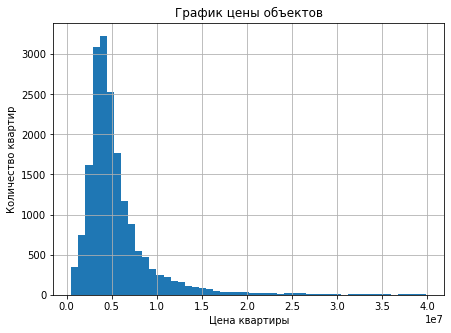

In [52]:
#цена объекта;
print(data["last_price"].describe())
data["last_price"].hist(bins=50, figsize = (7, 5))

plt.title('График цены объектов')
plt.xlabel('Цена квартиры')
plt.ylabel('Количество квартир')

plt.show()

count    18332.000000
mean        10.059548
std          4.718543
min          2.000000
25%          7.200000
50%          9.100000
75%         11.000000
max        100.700000
Name: kitchen_area, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


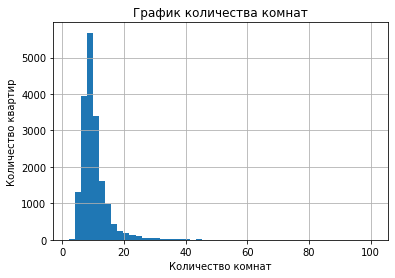

In [53]:
#количество комнат;
print(data["kitchen_area"].describe())
data["kitchen_area"].hist(bins=50)

plt.title('График количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')

plt.show()

count    18332.000000
mean         2.682626
std          0.191925
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.800000
Name: ceiling_height, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


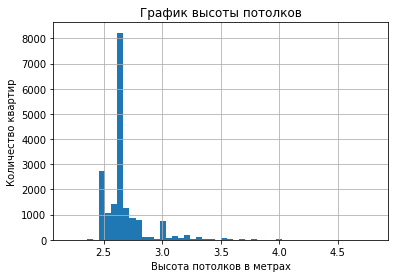

In [54]:
#высота потолков;
print(data["ceiling_height"].describe())
data["ceiling_height"].hist(bins=50)

plt.title('График высоты потолков')
plt.xlabel('Высота потолков в метрах')
plt.ylabel('Количество квартир')

plt.show()

count    18332.000000
mean         5.988817
std          4.930518
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


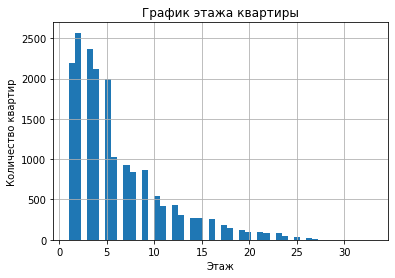

In [55]:
#этаж квартиры;
print(data["floor"].describe())
data["floor"].hist(bins=50)

plt.title('График этажа квартиры')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')

plt.show()

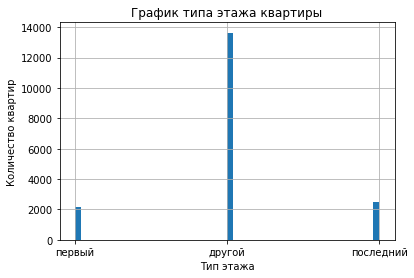

In [56]:
#тип этажа квартиры («первый», «последний», «другой»);
data["type_of_floor"].hist(bins=50)

plt.title('График типа этажа квартиры')
plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир')

plt.show()

count    18332.000000
mean        10.892047
std          6.631989
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64


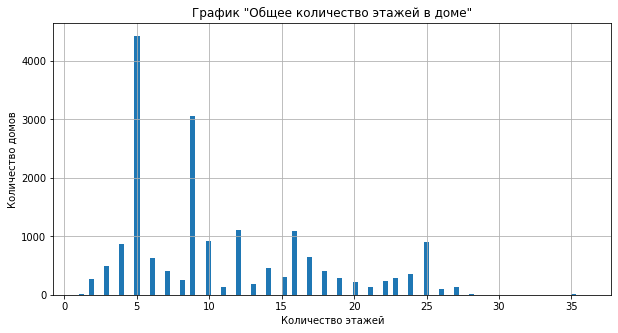

In [57]:
#общее количество этажей в доме;
print(data["floors_total"].describe())
data["floors_total"].hist(bins=100, figsize = (10, 5))

plt.title('График "Oбщее количество этажей в доме"')
plt.xlabel('Количество этажей')
plt.ylabel('Количество домов')

plt.show()

count    14148.000000
mean     14524.224484
std       8449.037102
min        208.000000
25%       9912.750000
50%      13307.000000
75%      16454.500000
max      64857.000000
Name: cityCenters_nearest, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


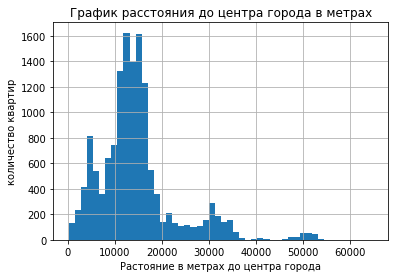

In [58]:
#расстояние до центра города в метрах;
print(data["cityCenters_nearest"].describe())
data["cityCenters_nearest"].hist(bins=50)

plt.title('График расстояния до центра города в метрах')
plt.xlabel('Растояние в метрах до центра города')
plt.ylabel('количество квартир')

plt.show()

count    14130.000000
mean     28996.843312
std      12844.965381
min          0.000000
25%      18399.000000
50%      27102.000000
75%      37593.000000
max      83758.000000
Name: airports_nearest, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


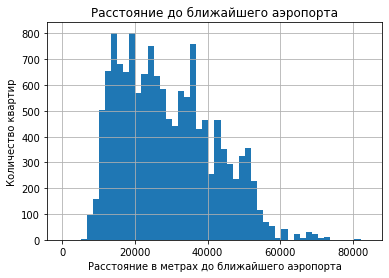

In [59]:
#расстояние до ближайшего аэропорта;
print(data["airports_nearest"].describe())
data["airports_nearest"].hist(bins=50)

plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Расстояние в метрах до ближайшего аэропорта')
plt.ylabel('Количество квартир')

plt.show()

count    6089.000000
mean      490.389555
std       340.284021
min         1.000000
25%       288.000000
50%       455.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


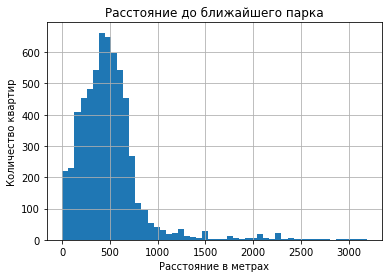

In [60]:
#расстояние до ближайшего парка;
print(data["parks_nearest"].describe())
data["parks_nearest"].hist(bins=50)

plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество квартир')

plt.show()

count    18332.000000
mean      2017.363299
std          0.842984
min       2015.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: year, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


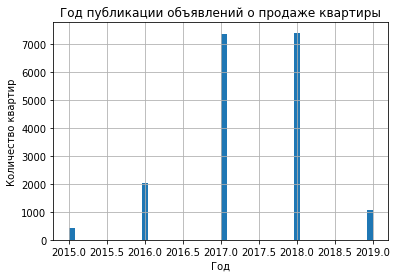

In [61]:
#день и месяц публикации объявления

print(data["year"].describe())
data["year"].hist(bins=50)

plt.title('Год публикации объявлений о продаже квартиры')
plt.xlabel('Год')
plt.ylabel('Количество квартир')

plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


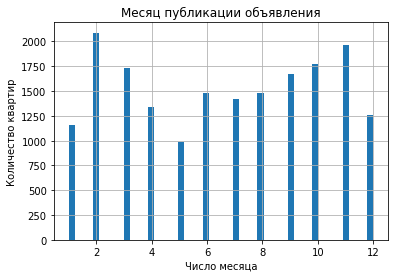

In [62]:
data["month"].hist(bins=50)
plt.title('Месяц публикации объявления')
plt.xlabel('Число месяца')
plt.ylabel('Количество квартир')

plt.show()

No handles with labels found to put in legend.


AxesSubplot(0.125,0.125;0.775x0.755)


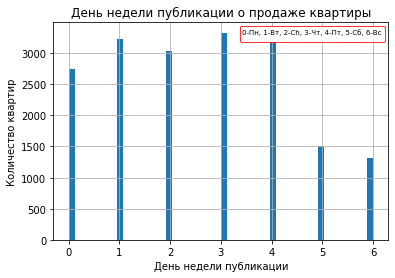

In [63]:
print(data["weekday"].hist(bins=50))

plt.title('День недели публикации о продаже квартиры')
plt.xlabel('День недели публикации')
plt.ylabel('Количество квартир')

plt.legend(fontsize = 7,
          edgecolor = 'r',    #  цвет крайней линии
          title = '0-Пн, 1-Вт, 2-Ch, 3-Чт, 4-Пт, 5-Сб, 6-Вс',    #  заголовок
          title_fontsize = '7')
plt.show()

Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

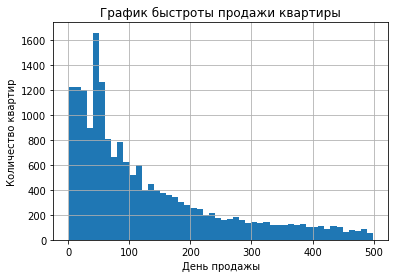

In [64]:
data["days_exposition"].hist(bins =50)

plt.title('График быстроты продажи квартиры')
plt.xlabel('День продажы')
plt.ylabel('Количество квартир')

plt.show()

In [65]:
data.pivot_table(index="rooms", values = "days_exposition", aggfunc=["median", "mean"])

,median,mean
,days_exposition,days_exposition
rooms,,
1,71.0,116.995091
2,83.0,124.381569
3,95.0,138.893092
4,119.0,156.583224
5,117.0,161.301775
6,125.0,175.019608
7,130.0,152.478261
8,115.0,166.0


Вывод: быстрее всего продаются 1комнатные, 2хкомнатные квартиры и 10ти комнатные)))

### Проведите исследовательский анализ данных

In [66]:
table_for_analisys = data[["last_price", "total_area", "living_area", "kitchen_area", "type_of_floor", "year", "month", "weekday", "rooms"]]
table_for_analisys

,last_price,total_area,living_area,kitchen_area,type_of_floor,year,month,weekday,rooms
1,3350000.0,40.40,18.60,11.00,первый,2018,12,1,1
4,10000000.0,100.00,32.00,41.00,другой,2018,6,1,2
5,2890000.0,30.40,14.40,9.10,другой,2018,9,0,1
6,3700000.0,37.30,10.60,14.40,другой,2017,11,3,1
8,2900000.0,33.16,15.43,8.81,другой,2018,5,2,1
...,...,...,...,...,...,...,...,...,...
23689,3550000.0,35.30,16.30,9.10,другой,2018,2,2,1
23690,5500000.0,52.00,31.00,6.00,другой,2018,7,3,2
23692,1350000.0,30.00,17.50,6.00,другой,2017,7,4,1
23693,4600000.0,62.40,40.00,8.00,другой,2016,8,4,3


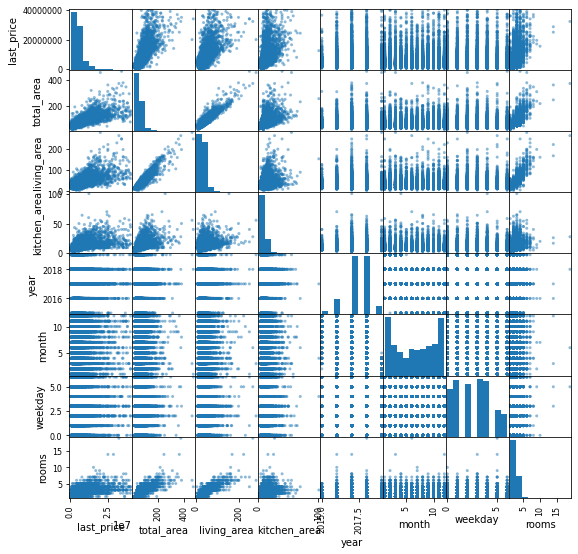

In [67]:
pd.plotting.scatter_matrix(table_for_analisys, figsize=(9, 9)) 

plt.show()

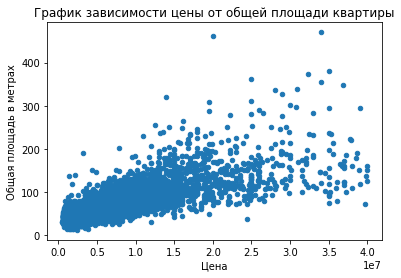

In [111]:
table_for_analisys.plot(x='last_price', y='total_area', kind='scatter')
plt.title('График зависимости цены от общей площади квартиры')
plt.xlabel('Цена')
plt.ylabel('Общая площадь в метрах')

plt.show()

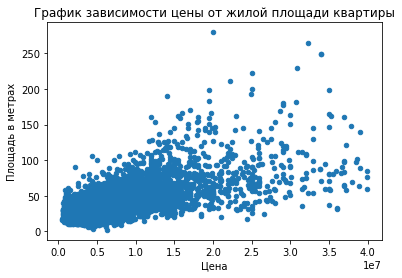

In [112]:
table_for_analisys.plot(x='last_price', y='living_area', kind='scatter')
plt.title('График зависимости цены от жилой площади квартиры')
plt.xlabel('Цена')
plt.ylabel('Площадь в метрах')

plt.show()

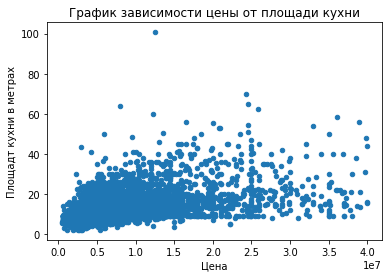

In [92]:
table_for_analisys.plot(x='last_price', y='kitchen_area', kind='scatter')
plt.title('График зависимости цены от площади кухни')
plt.xlabel('Цена')
plt.ylabel('Площадт кухни в метрах')

plt.show()

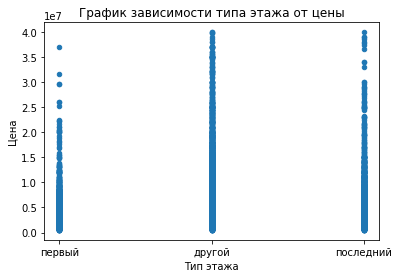

In [93]:
table_for_analisys.plot(x='type_of_floor', y='last_price', kind='scatter')
plt.title('График зависимости типа этажа от цены')
plt.xlabel('Тип этажа')
plt.ylabel('Цена')

plt.show()

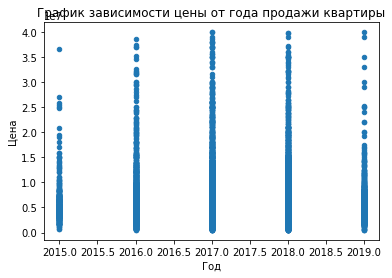

In [94]:
table_for_analisys.plot(x='year', y='last_price', kind='scatter')

plt.title('График зависимости цены от года продажи квартиры')
plt.xlabel('Год')
plt.ylabel('Цена')

plt.show()

Коэффициент корреляции [[ 1.         -0.10417305]
 [-0.10417305  1.        ]]


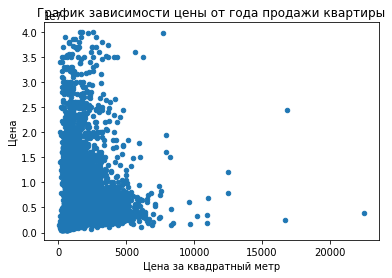

In [95]:
data.plot(x='price_per_sq_meter', y='last_price', kind='scatter')
print("Коэффициент корреляции", np.corrcoef(data['price_per_sq_meter'],data['last_price']))
plt.title('График зависимости цены от года продажи квартиры')
plt.xlabel('Цена за квадратный метр')
plt.ylabel('Цена')

plt.show()

Коэффициент корреляции [[ 1.        -0.5399667]
 [-0.5399667  1.       ]]


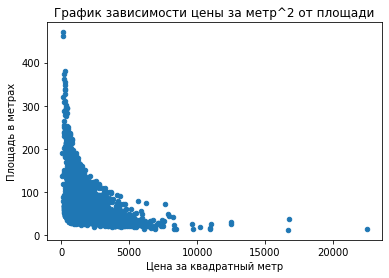

In [96]:
data.plot(x='price_per_sq_meter', y='total_area', kind='scatter')
print("Коэффициент корреляции", np.corrcoef(data['price_per_sq_meter'],data['total_area']))
plt.title('График зависимости цены за метр^2 от площади')
plt.xlabel('Цена за квадратный метр')
plt.ylabel('Площадь в метрах')

plt.show()

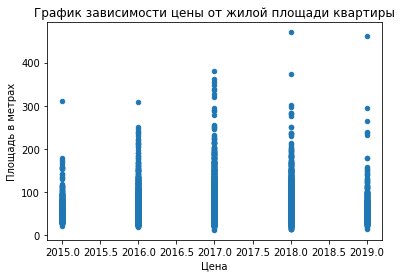

In [97]:
table_for_analisys.plot(x='year', y='total_area', kind='scatter')
plt.title('График зависимости цены от жилой площади квартиры')
plt.xlabel('Цена')
plt.ylabel('Площадь в метрах')

plt.show()

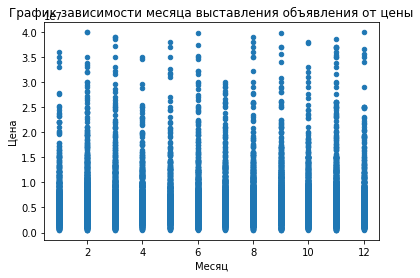

In [98]:
table_for_analisys.plot(x='month', y='last_price' , kind='scatter')

plt.title('График зависимости месяца выставления объявления от цены')
plt.xlabel('Месяц')
plt.ylabel('Цена')

plt.show()

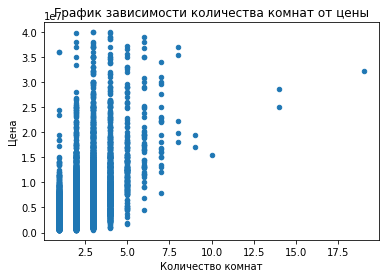

In [99]:
table_for_analisys.plot(x='rooms', y='last_price', kind='scatter')

plt.title('График зависимости количества комнат от цены')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')

plt.show()

Вывод: Дешевле обходятся квартирые 1нокомнатные, чем квартиры с большим числом комнат

No handles with labels found to put in legend.


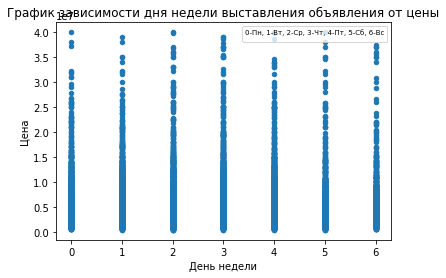

In [100]:
table_for_analisys.plot(x='weekday', y='last_price', kind='scatter')
plt.title('График зависимости дня недели выставления объявления от цены')
plt.xlabel('День недели')
plt.ylabel('Цена')


plt.legend(fontsize = 7, 
          title = '0-Пн, 1-Вт, 2-Ср, 3-Чт, 4-Пт, 5-Сб, 6-Вс',
          title_fontsize = '7'   )
plt.show()

Вывод: По субботам продаются самые дорогие квартиры, а по чт и вс дешевые

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."

In [79]:
count = data.pivot_table(index= "locality_name", values = "price_per_sq_meter", aggfunc="count").sort_values(by ="price_per_sq_meter", ascending=False)

In [80]:
price_area = data.pivot_table(index="locality_name", values = "price_per_sq_meter", aggfunc="mean").sort_values(by = "price_per_sq_meter")

In [81]:
table_price = count.merge(price_area, on = "locality_name")
table_price.columns = ["count", "price_per_scmeter"]
table_price.head(10)

,count,price_per_scmeter
locality_name,,
Санкт-Петербург,12146,2137.317834
посёлок Мурино,488,2183.875592
посёлок Шушары,380,1645.396216
Всеволожск,304,1393.141457
Колпино,293,1626.066943
посёлок Парголово,283,1971.898492
Пушкин,277,2058.263678
деревня деревня Кудрово,251,2201.702125
Гатчина,244,1502.890136


Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."

In [101]:
price_SPB_centre= data[data["locality_name"] == "Санкт-Петербург"]
#.pivot_table(index = "locality_name", values = "kms_per_citycenter")
price_SPB_centre.pivot_table(index = "kms_per_citycenter" , values = "price_per_sq_meter").sort_values(by = "kms_per_citycenter")

,price_per_sq_meter
kms_per_citycenter,
0.0,1803.646080
1.0,2016.496366
2.0,1839.721494
3.0,1710.157524
4.0,1905.390506
5.0,1987.503203
6.0,2175.581140
7.0,2202.726981
8.0,2130.027425


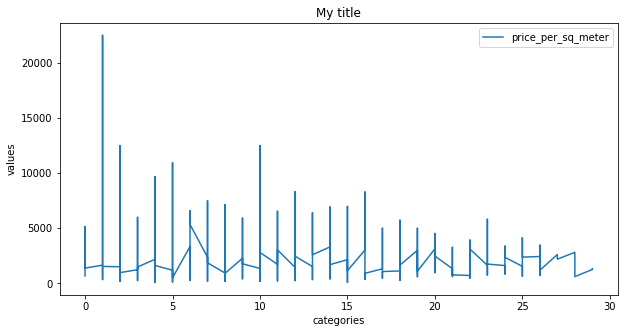

In [102]:
price_SPB_centre.sort_values("kms_per_citycenter").plot(x = "kms_per_citycenter", y = "price_per_sq_meter", figsize = (10, 5))

plt.title('My title')
plt.xlabel('categories')
plt.ylabel('values')

plt.show()


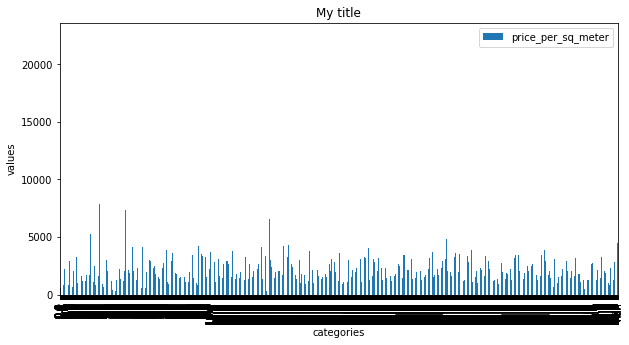

In [103]:
price_SPB_centre.sort_values("kms_per_citycenter").plot(x = "kms_per_citycenter", y = "price_per_sq_meter", figsize = (10, 5), kind ="bar")

plt.title('My title')
plt.xlabel('categories')
plt.ylabel('values')

plt.show()

In [108]:
data.shape

(18332, 29)

In [106]:
price_SPB_centre.pivot_table(index = "kms_per_citycenter" , values = "price_per_sq_meter").sort_values(by = "kms_per_citycenter")

,price_per_sq_meter
kms_per_citycenter,
0.0,1803.646080
1.0,2016.496366
2.0,1839.721494
3.0,1710.157524
4.0,1905.390506
5.0,1987.503203
6.0,2175.581140
7.0,2202.726981
8.0,2130.027425


### Общий вывод

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод

### Общий вывод